# <center>Student Grade Prediction</center>
#### <center>by Sushant Deshpande</center>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
grades = pd.read_csv("data/grades.csv")
grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Let's find out how many null values are present in out dataset

In [3]:
grades.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Let's fid out what are the datatypes of each column

In [4]:
grades.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Now first, let's make a copy of the original dataset and call it <code>grades_working</code>

In [5]:
grades_working = grades.copy()

In [6]:
grades_working["schoolsup"].head()

0    yes
1     no
2    yes
3     no
4     no
Name: schoolsup, dtype: object

In [7]:
grades_working["schoolsup"] = grades_working["schoolsup"].map({'yes': 1, 'no': 0})
grades_working["famsup"] = grades_working["famsup"].map({'yes': 1, 'no': 0})
grades_working["paid"] = grades_working["paid"].map({'yes': 1, 'no': 0})
grades_working["activities"] = grades_working["activities"].map({'yes': 1, 'no': 0})
grades_working["nursery"] = grades_working["nursery"].map({'yes': 1, 'no': 0})
grades_working["higher"] = grades_working["higher"].map({'yes': 1, 'no': 0})
grades_working["internet"] = grades_working["internet"].map({'yes': 1, 'no': 0})
grades_working["romantic"] = grades_working["romantic"].map({'yes': 1, 'no': 0})

In [8]:
grades_working.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

<hr>

#### BEGIN TESTING

In [9]:
#Testing
grades_dummies = pd.get_dummies(grades_working["sex"])
grades_dummies.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
grades_dummies.count()

F    395
M    395
dtype: int64

In [11]:
empty_df = pd.DataFrame(columns=[])
empty_df

""


In [12]:
empty_df_test = pd.DataFrame(columns=[])
empty_df_test

""


In [13]:
test_df = pd.concat([empty_df_test, grades_working["sex"], grades_working["age"], grades_working["school"]], axis=1)
test_df.head()

,sex,age,school
0,F,18,GP
1,F,17,GP
2,F,15,GP
3,F,15,GP
4,F,16,GP


In [14]:
for i in test_df:
    if (test_df.dtypes[i] == "object"):
        temp_df = pd.get_dummies(grades_working[i])
        #grades_dummies = grades_working.drop(columns=[i])
        empty_df = pd.concat([empty_df, temp_df], axis=1)

empty_df.count()

F     395
M     395
GP    395
MS    395
dtype: int64

In [15]:
empty_df.head()

,F,M,GP,MS
0,1,0,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0


#### END TESTING
<hr>

In [16]:
empty_df_blank = pd.DataFrame(columns=[])

In [17]:
for i in grades_working:
    if (grades_working.dtypes[i] == "object"):
        temp_df = pd.get_dummies(grades_working[i])
        #grades_non_dummies = grades_working.drop(i, axis=1)
        empty_df_blank = pd.concat([empty_df_blank, temp_df], axis=1)

empty_df_blank.head()

,GP,MS,F,M,R,U,GT3,LE3,A,T,...,other,services,teacher,course,home,other,reputation,father,mother,other
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [18]:
empty_df_blank.dtypes

GP            uint8
MS            uint8
F             uint8
M             uint8
R             uint8
U             uint8
GT3           uint8
LE3           uint8
A             uint8
T             uint8
at_home       uint8
health        uint8
other         uint8
services      uint8
teacher       uint8
at_home       uint8
health        uint8
other         uint8
services      uint8
teacher       uint8
course        uint8
home          uint8
other         uint8
reputation    uint8
father        uint8
mother        uint8
other         uint8
dtype: object

In [19]:
for i in grades_working:
    if (grades_working.dtypes[i] == "object"):
        #temp_df = pd.get_dummies(grades_working[i])
        grades_working = grades_working.drop(i, axis=1)
        #empty_df_blank = pd.concat([empty_df_blank, temp_df], axis=1)

grades_working.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,1,0,0,0,...,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,0,1,0,0,...,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,1,0,1,0,...,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,0,1,1,1,...,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,0,1,1,0,...,4,3,2,1,2,5,4,6,10,10


In [20]:
grades_final = pd.concat([grades_working, empty_df_blank], axis=1)
grades_final.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,other,services,teacher,course,home,other,reputation,father,mother,other
0,18,4,4,2,2,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0


In [21]:
grades_final.dtypes

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
GP            uint8
MS            uint8
F             uint8
M             uint8
R             uint8
U             uint8
GT3           uint8
LE3           uint8
A             uint8
T             uint8
at_home       uint8
health        uint8
other         uint8
services      uint8
teacher       uint8
at_home       uint8
health        uint8
other         uint8
services      uint8
teacher       uint8
course        uint8
home          uint8
other         uint8
reputation    uint8
father        uint8
mother        uint8


import numpy as np
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

for i in grades_final.columns:
    if (is_numeric_dtype(grades_final[i])):
        print('a')

allc = list((grades_final.loc[:, grades_final.dtypes == np.int64]).columns)
for y in allc:
    print('int')

for y in grades_final.columns:
    if(grades_final[y].dtype == np.int64):
        print('a')

In [22]:
X = grades_final.drop('G3', axis=1)
y = grades_final['G3']

In [23]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)



#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train_minmax,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top_features = featureScores.nlargest(19,'Score')
print(top_features)  #print best features

         Specs      Score
5     failures  38.740947
21          G1  28.906988
33     at_home  25.496292
6    schoolsup  25.232126
13    romantic  19.134260
34      health  17.915130
8         paid  17.620926
45       other  17.563107
22          G2  17.325296
46  reputation  17.176953
36    services  16.768418
38     at_home  14.633767
31           A  13.079180
42     teacher  12.719343
27           R  11.166497
37     teacher  10.581299
24          MS  10.435549
26           M  10.100207
43      course  10.011794


In [25]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
# Fit the model to the training data and calculate the score for the training data

model.fit(X_train_minmax, y_train)
training_score = model.score(X_train_minmax, y_train)

print(f"Training Score: {training_score}")

Training Score: 0.8622314115268453


In [27]:
# Calculate the score for the testing data

testing_score = model.score(X_test_minmax, y_test)
print(f"Testing Score: {testing_score}")

Testing Score: 0.7812293279464217


#### Selecting Best Features

In [28]:
feature_arrey = []
for i in top_features["Specs"]:
    feature_arrey.append(i)

In [29]:
feature_selected_df = grades_final.loc[:, feature_arrey]
feature_selected_df.head()

,failures,G1,at_home,at_home,schoolsup,romantic,health,health,health,paid,...,at_home,A,teacher,teacher,R,teacher,teacher,MS,M,course
0,0,5,1,0,1,0,3,0,0,0,...,0,1,0,1,0,0,1,0,0,1
1,0,5,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,7,1,0,1,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,15,0,0,0,1,5,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,6,0,0,0,0,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_feature = feature_selected_df.copy()
y_feature = grades_final['G3']

In [31]:
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y_feature, random_state=42)
X_train_feature.head()

,failures,G1,at_home,at_home,schoolsup,romantic,health,health,health,paid,...,at_home,A,teacher,teacher,R,teacher,teacher,MS,M,course
16,0,13,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
66,0,13,0,0,0,1,3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
211,0,12,0,0,0,1,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,0,6,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
19,0,8,0,0,0,0,5,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [32]:
X_minmax_feature = MinMaxScaler().fit(X_train_feature)

X_train_minmax_feature = X_minmax_feature.transform(X_train_feature)
X_test_minmax_feature = X_minmax_feature.transform(X_test_feature)

In [33]:
model.fit(X_train_minmax_feature, y_train_feature)
training_score_feature = model.score(X_train_minmax_feature, y_train_feature)

print(f"Training Score: {training_score_feature}")

Training Score: 0.8398808444211366


In [34]:
# Calculate the score for the testing data

testing_score_feature = model.score(X_test_minmax_feature, y_test_feature)
print(f"Testing Score: {testing_score_feature}")

Testing Score: 0.7938934567962836


In [35]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
regr.coef_

array([-1.73135322e-01,  1.29724861e-01, -1.33787854e-01,  9.70972520e-02,
       -1.04779954e-01, -1.60608558e-01,  4.56467477e-01,  1.76552134e-01,
        7.61899362e-02, -3.45785346e-01, -2.22143379e-01,  2.25860726e-01,
       -1.44194011e-01, -2.71883159e-01,  3.56965015e-01,  4.70991258e-02,
        1.18191733e-02, -1.85123343e-01,  1.76763124e-01,  6.29547387e-02,
        4.58748209e-02,  1.88756816e-01,  9.57354671e-01, -6.76051723e+11,
       -6.76051723e+11,  8.80102251e+11,  8.80102251e+11,  1.13605457e+11,
        1.13605457e+11, -1.40447826e+10, -1.40447826e+10, -9.45366593e+10,
       -9.45366593e+10, -2.33111178e+11, -2.33111178e+11, -2.33111178e+11,
       -2.33111178e+11, -2.33111178e+11,  1.13272768e+11,  1.13272768e+11,
        1.13272768e+11,  1.13272768e+11,  1.13272768e+11, -8.35928104e+10,
       -8.35928104e+10, -8.35928104e+10, -8.35928104e+10,  5.54390160e+11,
        5.54390160e+11,  5.54390160e+11])

In [37]:
regr.intercept_

-560033481943.9865

Text(0.5, 1.0, 'Residual Plot')

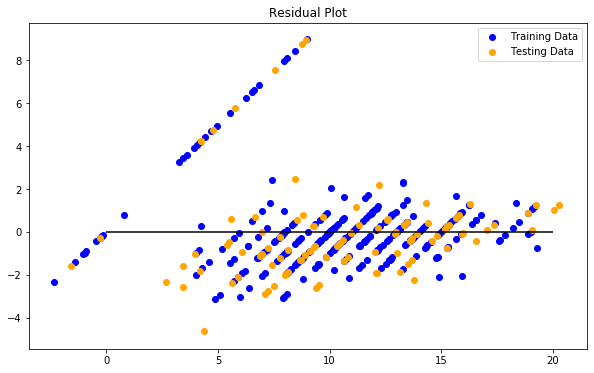

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_train_minmax_feature), model.predict(X_train_minmax_feature) - y_train_feature, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_minmax_feature), model.predict(X_test_minmax_feature) - y_test_feature, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")